In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_gs_1 = pd.read_excel('../data/innovation/gs/동별매출지수.xlsx')
df_gs_2 = pd.read_excel('../data/innovation/gs/카테고리별매출비중.xlsx')
df_gs_3 = pd.read_excel('../data/innovation/gs/종합테이블.xlsx')

In [3]:
print("Amount of days : ", len(df_gs_3.OPER_DT.unique()))
print("Amount of Dong : ", len(df_gs_3.ADMD_CD.unique()))

Amount of days :  365
Amount of Dong :  36


# 결측치 처리

In [4]:
print("결측치 총량")
df_gs_3.isnull().sum()

결측치 총량


OPER_DT         0
BOR_CD          0
ADMD_CD         0
AMT_IND        15
LCLS_10_P      15
LCLS_20_P      15
LCLS_30_P      15
LCLS_40_P      47
LCLS_50_P      17
LCLS_60_P    1065
LCLS_70_P     254
LCLS_80_P     597
dtype: int64

In [5]:
df_gs_3.head()

,OPER_DT,BOR_CD,ADMD_CD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,20180401,1111,11110515,0.736933,0.279018,0.299569,0.334816,0.015636,0.053782,0.000265,0.013092,0.003823
1,20180401,1111,11110530,1.258473,0.237403,0.257984,0.349826,0.045502,0.092581,0.004988,0.002467,0.009250
2,20180401,1111,11110540,0.674164,0.254081,0.246844,0.324434,0.065025,0.089691,NaN,0.013212,0.006712
3,20180401,1111,11110550,1.010874,0.416368,0.217715,0.282613,0.026738,0.036622,0.005893,0.012295,0.001756
4,20180401,1111,11110560,1.012942,0.311321,0.267387,0.262358,0.014736,0.135350,NaN,0.007270,0.001577


In [62]:
null = df_gs_3.isnull().sum()[['LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P','LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P']]

([<matplotlib.axis.YTick at 0x1b8ca61bb38>,
 <a list of 7 Text yticklabel objects>)

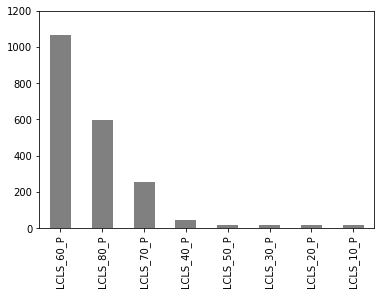

In [63]:
null.sort_values(ascending = False).plot(kind = 'bar', color = 'grey')
plt.yticks([0, 200, 400, 600, 800, 1000, 1200])

In [64]:
df_gs_3.fillna(method = "ffill", inplace = True)

In [65]:
print("결측치 총량")
df_gs_3.isnull().sum()

결측치 총량


OPER_DT      0
BOR_CD       0
ADMD_CD      0
AMT_IND      0
LCLS_10_P    0
LCLS_20_P    0
LCLS_30_P    0
LCLS_40_P    0
LCLS_50_P    0
LCLS_60_P    0
LCLS_70_P    0
LCLS_80_P    0
dtype: int64

* Add GU_NM, DONG_NM

In [66]:
ADMD_temp1 = list(df_gs_3.ADMD_CD.unique())

In [67]:
ADMD_temp2 = ["청운효자동","사직동", "삼청동", "부암동", "평창동", "무악동",
              "교남동", "가회동", "종로1.2.3.4가동", "종로5.6가동", "이화동",
              "혜화동", "창신1동", "창신2동", "창신3동", "숭인1동", "숭인2동",
              "월계1동", "월계2동", "월계3동", "공릉1동", "공릉2동", "하계1동",
              "하계2동", "중계본동", "중계1동", "중계4동", "중계2.3동", "상계1동",
              "상계2동", "상계3.4동", "상계5동", "상계6.7동", "상계8동", "상계9동", "상계10동"]

In [68]:
len(ADMD_temp1), len(ADMD_temp2)

(36, 36)

In [69]:
BOR_NM_dict = {1111:'종로구', 1135:'노원구'}
ADMD_NM_dict = dict()
for i in range(len(ADMD_temp1)):
    ADMD_NM_dict[ADMD_temp1[i]]=ADMD_temp2[i]

In [70]:
gs_cols_name_dict = {'OPER_DT':'DATE', 'BOR_CD':'GU_CD', 'ADMD_CD':'DONG_CD'}
df_gs_total = df_gs_3.rename(columns=gs_cols_name_dict)

In [71]:
GU_NM_list = [BOR_NM_dict[i] for i in df_gs_total.GU_CD]

df_gs_total['GU_NM']=GU_NM_list

In [72]:
DONG_NM_list = [ADMD_NM_dict[i] for i in df_gs_total.DONG_CD]
df_gs_total['DONG_NM'] = DONG_NM_list

* change entry from ratio to price

In [73]:
df_gs_total.AMT_IND = df_gs_total.AMT_IND*1024712

In [74]:
change_cols = ['LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P']
for i in change_cols:
    df_gs_total[i] = df_gs_total[i]*df_gs_total.AMT_IND

# 매출상위 확인하기

In [75]:
df_top = df_gs_total.groupby('GU_NM').sum()[['LCLS_10_P', 'LCLS_20_P','LCLS_30_P','LCLS_40_P','LCLS_50_P','LCLS_60_P','LCLS_70_P','LCLS_80_P']].T

df_top_JONGRO = df_top[["종로구"]]
df_top_NOWON = df_top[["노원구"]]

name_dict = {'LCLS_10_P':'food','LCLS_20_P':'snack',
            'LCLS_30_P':'drink','LCLS_40_P':'home&living',
            'LCLS_50_P':'health&beauty','LCLS_60_P':'hobby',
            'LCLS_70_P':'social','LCLS_80_P':'pregnant',
            'LCLS_90_P':'Preference'}

index_list = [name_dict[i] for i in df_top.index]

df_top_JONGRO.index = index_list
df_top_NOWON.index = index_list

df_top_JONGRO = df_top_JONGRO.sort_values(by='종로구')
df_top_NOWON = df_top_NOWON.sort_values(by='노원구')

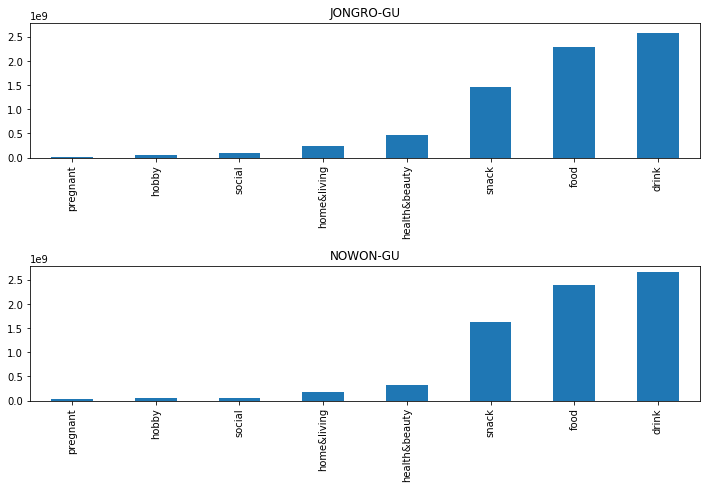

In [76]:
fig1, axes = plt.subplots(2, 1, sharey = True)
df_top_JONGRO.loc[:, '종로구'].plot(kind = 'bar', ax = axes[0], figsize = (12, 6), title = 'JONGRO-GU')
df_top_NOWON.loc[:, '노원구'].plot(kind = 'bar', ax = axes[1], figsize = (12, 6), title = 'NOWON-GU')
plt.subplots_adjust(hspace = 0.8, top = 1, wspace = 1)

# 매출 경향 파악하기

In [80]:
df_gs_total = df_gs_total.groupby(['DATE', 'GU_NM']).mean().reset_index()

In [81]:
df_total_jongro = df_gs_total.iloc[np.where(df_gs_total.GU_NM=='종로구')[0]]
df_total_nowon = df_gs_total.iloc[np.where(df_gs_total.GU_NM=='노원구')[0]]

dateIdx = pd.date_range('2018-04-01', '2019-03-31')

df_total_jongro.index = dateIdx
df_total_nowon.index = dateIdx

drop_cols = [
    'DATE', 'GU_NM',
    'GU_CD', 'DONG_CD', 'AMT_IND']

df_total_jongro.drop(drop_cols, inplace=True, axis=1)
df_total_nowon.drop(drop_cols, inplace=True, axis=1)

df_total_jongro_W = df_total_jongro.resample('W').sum()
df_total_nowon_W = df_total_nowon.resample('W').sum()

df_total_jongro_M = df_total_jongro.resample('M').sum()
df_total_nowon_M = df_total_nowon.resample('M').sum()

C:\Users\JuhoSon\Miniconda3\envs\2019BigC\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


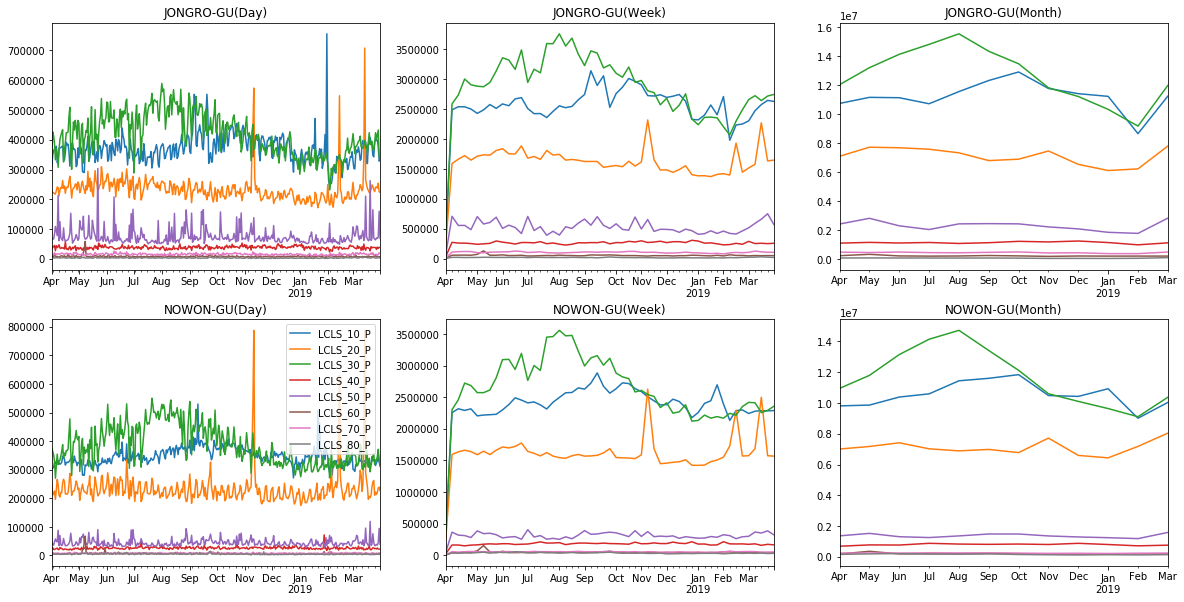

In [82]:
fig2, axes = plt.subplots(2, 3)
df_total_jongro.plot(ax = axes[0, 0], figsize = (20, 10), title = 'JONGRO-GU(Day)', legend = False)
df_total_nowon.plot(ax = axes[1, 0], figsize = (20, 10), title = 'NOWON-GU(Day)')
df_total_jongro_W.plot(ax = axes[0, 1], figsize = (20, 10), title = 'JONGRO-GU(Week)', legend = False)
df_total_nowon_W.plot(ax = axes[1, 1], figsize = (20, 10), title = 'NOWON-GU(Week)', legend = False)
df_total_jongro_M.plot(ax = axes[0, 2], figsize = (20, 10), title = 'JONGRO-GU(Month)', legend = False)
df_total_nowon_M.plot(ax = axes[1, 2], figsize = (20, 10), title = 'NOWON-GU(Month)', legend = False)

In [83]:
# df_gs_total.to_csv('../data/innovation/gs/df_gs.csv', index=False)

# 카테고리와 미세먼지간의 상관관계 확인

* Load asos

In [85]:
df_asos_no = pd.read_csv('../data/innovation/Merge_data/df_asos_nowon.csv')
df_asos_jong = pd.read_csv('../data/innovation/Merge_data/df_asos_jongro.csv')

In [86]:
df_asos = pd.concat([df_asos_no, df_asos_jong]).groupby(['DATE', 'GU_NM']).sum().reset_index()

In [87]:
df_asos['DATE'] = df_asos.DATE.astype(int)

In [88]:
df_asos.head()

,DATE,GU_NM,pm10,pm25,humi,temp,CONTENT,강수량(mm)
0,20180401,노원구,68.328472,35.256944,56.769284,16.578527,515,0.0
1,20180401,종로구,84.070139,43.877083,61.370139,16.692569,515,0.0
2,20180402,노원구,72.005556,29.909028,57.838777,19.628631,888,0.0
3,20180402,종로구,72.274306,30.051389,58.825694,19.561181,888,0.0
4,20180403,노원구,72.838194,24.295833,61.681723,19.191452,856,0.1


* Merge

In [89]:
df_total = df_gs_total.merge(df_asos, on=['DATE', 'GU_NM'])

* corr

In [90]:
df_total_corr = df_total.corr()[['pm10', 'pm25', 'CONTENT']]

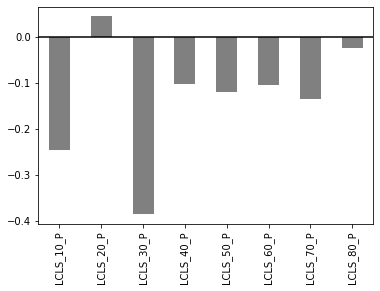

In [91]:
df_total_corr.pm10["LCLS_10_P":"LCLS_80_P"].plot(kind = 'bar', color = 'grey')
plt.axhline(0, color= 'k')

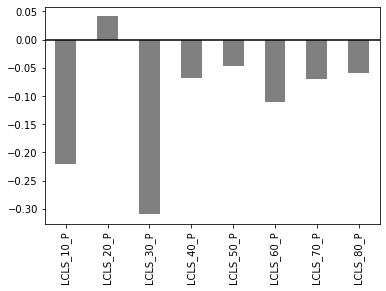

In [92]:
df_total_corr.pm25["LCLS_10_P":"LCLS_80_P"].plot(kind = 'bar', color = 'grey')
plt.axhline(0, color= 'k')

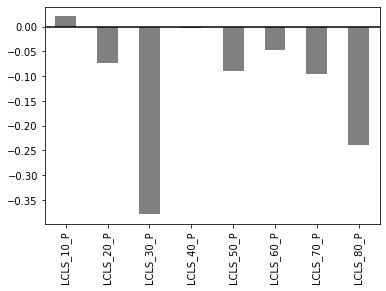

In [93]:
df_total_corr.CONTENT["LCLS_10_P":"LCLS_80_P"].plot(kind = 'bar', color = 'grey')
plt.axhline(0, color= 'k')

# 정리
* 미세먼지와 GS유통데이터와 유의미한 상관관계는 없다.

# 매출상위 체크-종로구

In [94]:
df_top = df_total.groupby('GU_NM').sum()[['LCLS_10_P', 'LCLS_20_P','LCLS_30_P','LCLS_40_P','LCLS_50_P','LCLS_60_P','LCLS_70_P','LCLS_80_P']].T

In [95]:
df_top = df_top.sort_values(by='종로구')

In [96]:
name_dict = {'LCLS_10_P':'food_GS','LCLS_20_P':'snack_GS',
            'LCLS_30_P':'drink_GS','LCLS_40_P':'home_GS',
            'LCLS_50_P':'health_GS','LCLS_60_P':'hobby_GS',
            'LCLS_70_P':'social_GS','LCLS_80_P':'pregnant_GS'}

In [97]:
index_list = [name_dict[i] for i in df_top.index]

In [98]:
df_top.index = index_list

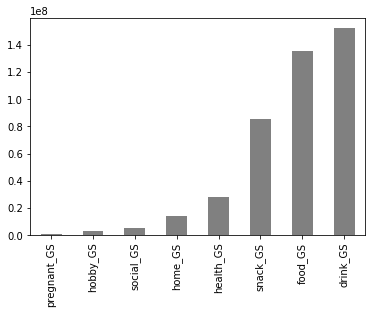

In [99]:
df_top.종로구.plot(kind = 'bar', color = 'grey')

# 매출상위 체크-노원구

In [100]:
df_top_nowon = df_total.groupby('GU_NM').sum()[['LCLS_10_P', 'LCLS_20_P','LCLS_30_P','LCLS_40_P','LCLS_50_P','LCLS_60_P','LCLS_70_P','LCLS_80_P']].T

In [101]:
df_top_nowon = df_top_nowon.sort_values(by='노원구')

In [102]:
name_dict = {'LCLS_10_P':'food_GS','LCLS_20_P':'snack_GS',
            'LCLS_30_P':'drink_GS','LCLS_40_P':'home_GS',
            'LCLS_50_P':'health_GS','LCLS_60_P':'hobby_GS',
            'LCLS_70_P':'social_GS','LCLS_80_P':'pregnant_GS'}

In [103]:
index_list = [name_dict[i] for i in df_top_nowon.index]

In [104]:
df_top_nowon.index = index_list

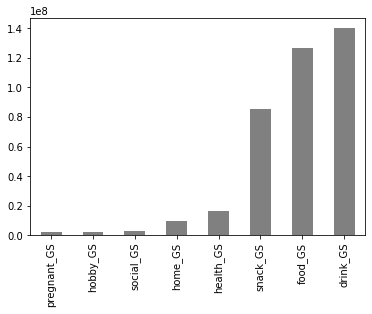

In [105]:
df_top.노원구.plot(kind = 'bar', color = 'grey')

# Merge

In [106]:
df_gs = df_gs_total.groupby('DATE').sum()[['LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P']].reset_index()

In [109]:
# df_gs.to_csv('../data/innovation/gs/df_gs.csv', index=False)

In [110]:
df_gs = df_gs_total.groupby(['DATE', 'GU_NM']).sum()

In [111]:
nowon_idx = [(df_gs.index[i][0], '노원구') for i in range(len(df_gs)) if i % 2 ==0]
jongro_idx = [(df_gs.index[i][0], '종로구') for i in range(len(df_gs)) if i % 2 ==0]

In [112]:
df_gs_nowon = df_gs.loc[nowon_idx]
df_gs_jongro = df_gs.loc[jongro_idx]

In [113]:
df_gs_nowon = df_gs_nowon.unstack()
df_gs_jongro = df_gs_jongro.unstack()

In [114]:
df_gs_nowon = df_gs_nowon[['LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P']]
df_gs_jongro = df_gs_jongro[['LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P']]

In [115]:
df_gs_nowon.columns=['LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P']
df_gs_jongro.columns=['LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P', 'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P', ]

In [119]:
df_gs_nowon.to_csv('../data/innovation/Merge_data/df_gs_nowon.csv',index=False)
df_gs_jongro.to_csv('../data/innovation/Merge_data/df_gs_jongro.csv',index=False)